Cargando la BD [MNIST](https://http://yann.lecun.com/exdb/mnist/) en Keras

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Información sobre los datos de entrenamiento

In [110]:
train_images.shape

(60000, 28, 28)

In [111]:
len(train_labels)

60000

In [112]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Información sobre los datos de prueba

In [113]:
test_images.shape

(10000, 28, 28)

In [114]:
len(test_labels)

10000

In [115]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Arquitectura de la red

In [116]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])

Definición de optimizador, función de pérdida y métrica

In [117]:
model.compile(optimizer='rmsprop',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

Preparando los datos

In [118]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Entrenando la red

In [119]:
history = model.fit(x=train_images, y=train_labels, batch_size= 32, epochs=40, verbose=1, validation_split=0.1, shuffle=True)
model.summary()

Epoch 1/40
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2150 - accuracy: 0.9360 - val_loss: 0.1029 - val_accuracy: 0.9707
Epoch 2/40
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0893 - accuracy: 0.9734 - val_loss: 0.0765 - val_accuracy: 0.9782
Epoch 3/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.0713 - val_accuracy: 0.9803
Epoch 4/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0710 - val_accuracy: 0.9832
Epoch 5/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9894 - val_loss: 0.0737 - val_accuracy: 0.9823
Epoch 6/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9922 - val_loss: 0.0893 - val_accuracy: 0.9795
Epoch 7/40
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0208 - accuracy: 0.9939 - val_loss: 0.0760 - val_accuracy:

Hacer algunas predicciones (probabilidad de que sea un digito 0-9)

In [120]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]
print(predictions)

1/1 [==============================] - 0s 42ms/step
[[6.55133451e-16 5.68438393e-18 1.13567628e-14 7.73272835e-11
  1.63395357e-27 1.33716103e-18 1.90160628e-25 1.00000000e+00
  4.25545837e-18 7.08593503e-13]
 [2.04014188e-17 2.45053565e-12 1.00000000e+00 1.42993968e-14
  1.20649504e-26 1.04934097e-19 2.15700695e-17 2.24295496e-27
  5.08566967e-15 1.29336779e-27]
 [3.18792871e-13 1.00000000e+00 3.29620287e-09 2.79395647e-14
  1.46731405e-09 8.08440467e-12 3.55034960e-11 2.95995428e-09
  1.92141272e-08 1.83151783e-14]
 [1.00000000e+00 5.31333731e-21 1.64777358e-13 2.41340817e-20
  5.17855695e-17 4.59653567e-15 3.22981811e-12 8.16862745e-13
  6.51524829e-23 6.18220126e-15]
 [3.28331858e-14 4.93380107e-18 9.54145176e-15 1.67444410e-20
  9.99999881e-01 5.50327294e-19 2.84335272e-13 1.77620085e-10
  1.97332101e-15 6.94052602e-08]
 [2.26544547e-16 1.00000000e+00 4.01503341e-14 3.49511126e-16
  1.86711688e-11 2.72618166e-17 2.52940899e-16 5.28978905e-09
  3.78204079e-10 5.41052618e-16]
 [1.72

Verificación del dígito

In [121]:
test_labels[1]

2

Verificar sobreajuste

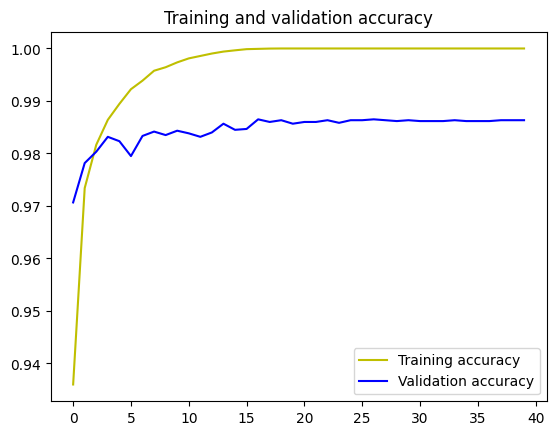

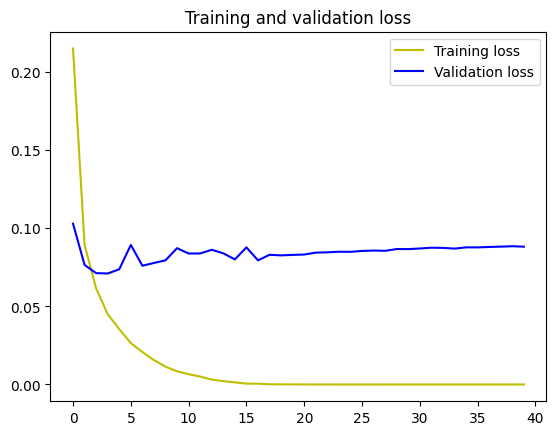

In [122]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(accuracy, "y", label="Training accuracy")
plt.plot(val_accuracy, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(loss, "y", label="Training loss")
plt.plot(val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluando la red

In [123]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc: ', test_acc)
print('test_loss: ',test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0869 - accuracy: 0.9843
test_acc:  0.9843000173568726
test_loss:  0.08691756427288055


Cálculo de la matriz de confusion

313/313 [==============================] - 1s 2ms/step


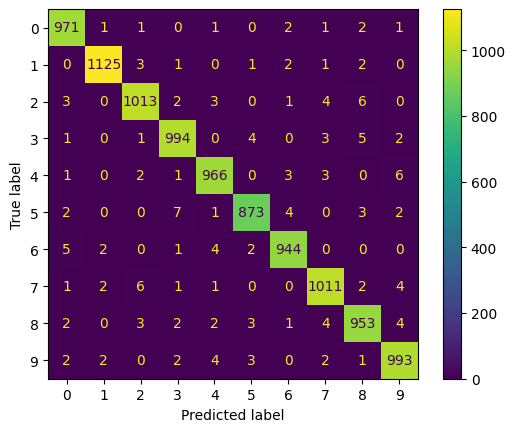

In [124]:
test_predictions = model.predict(test_images)
cm = confusion_matrix(test_labels, test_predictions.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Algunas métricas

In [125]:
from sklearn.metrics import precision_recall_fscore_support
train_labelsOut=model.predict(train_images)
print(precision_recall_fscore_support(train_labels,np.argmax(train_labelsOut,axis=1),average=None,labels=[0,1,2,3,4,5,6,7,8,9]))

1875/1875 [==============================] - 3s 1ms/step
(array([0.99966211, 0.99851786, 0.99865794, 0.99723082, 0.99914325,
       0.99926008, 0.99831252, 0.99952077, 0.99880362, 0.99731318]), array([0.998987  , 0.99925838, 0.99916079, 0.99853205, 0.99811708,
       0.99649511, 0.99966205, 0.99872306, 0.99880362, 0.99831905]), array([0.99932444, 0.99888798, 0.9989093 , 0.99788101, 0.9986299 ,
       0.99787568, 0.99898683, 0.99912176, 0.99880362, 0.99781586]), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


Cargar de nuevo la BD y visualizar el dígito de la predicción

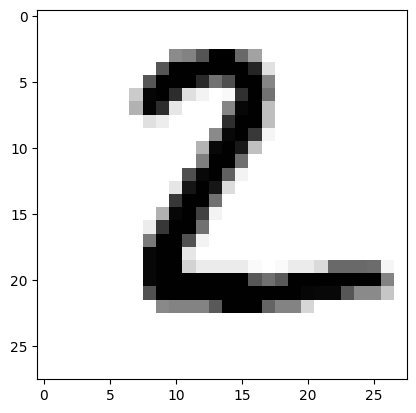

In [126]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

digit = test_images[1]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Ejercicios:
----------
1. Cambie el batch_size ¿Qué observa? ¿Qué sucede si cambia su valor?

**Con batch_size de 60**:

train_loss: 0.0075 - train_accuracy: 0.9978

test_loss: 0.0704 - test_accuracy: 0.9814

**Con batch_size de 32**:

Train_Loss: 0.0092 - train_accuracy: 0.9974

test_loss: 0.0795 - test_acc: 0.9817

**Con batch:size de 24**:

train_Loss: 0.0063 - train_accuracy: 0.9981

test_loss:  0.0902- test_acc:  0.9815

**Con batch_size de 16**

train_loss: 0.0186 - train_accuracy: 0.9952

test_loss: 0.1220 - test_acc: 0.9777


Al cambiar el valor de "batch_size" (tamaño del lote), se puede observar que los valores en la precisión (accuracy) no difieren significativamente. En todos los casos, se obtiene un valor similar y bastante alto. En cuanto a la función de pérdida, se puede observar que a medida que el "batch_size" aumenta, la "Loss_function" tiende a tener un valor más pequeño. Esto se refleja en las gráficas en relación con las épocas, lo cual coincide con la idea de que el modelo tiende a converger más rápidamente hacia un valor.

2. ¿Mejora la precisión (**accuracy**) si aumenta las pasadas (**epoch**)? ¿Por qué?

Se parte con un batch_size de 32 para cada uno

**Con 10 epocas**:

Train_Loss: 0.0092 - train_accuracy: 0.9974

test_loss: 0.0795 - test_acc: 0.9817

**Con 40 epocas**:

train_loss: 1.4132e-05 - train_accuracy: 1.0000

test_loss: 0.0869 - test_accuracy: 0.9843

Únicamente con estos dos ejemplos y al analizar las curvas de Precisión vs Épocas, se puede observar que el modelo logra alcanzar un 100% de precisión después de 40 épocas. Esto podría sugerir que el modelo memoriza los datos de entrenamiento, lo que explicaría su falta de errores en la clasificación. Sin embargo, al evaluar los datos de prueba, se puede observar que el modelo es capaz de clasificar datos nunca antes vistos con una precisión similar. Esto indica que el modelo no está sobreajustado ni subajustado. En otras palabras, realizar un número excesivo de épocas sería un desperdicio de recursos, ya que con alrededor de 15 épocas, el modelo alcanza una precisión muy alta.